# <h1><center> COMMUNICATION THROUGH DATA and STORY THROUGH VISUALIZATION </center></h1>

## Exploratory Data Analysis (EDA)

### Meenakshi Nerolu           
### Date : October 21, 2020

In the project, the following Exploratory Data Analysis (EDA) is performed:

* Importing the libraries, loading the data set, basic data exploration
* Handling Missing Value
* Removing duplicates
* Handling Outlier 
* Descriptive Statistics


## Importing Libraries

In [1]:
## import packages:
import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
import plotly.express as px

# 2.Traffic Violation <a class="anchor" id="sec3"></a> 

## Loading the Dataset

 ## Reading "Traffic_Violations" data <a class="anchor" id="subsec_3_1"></a>  

In [2]:
traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)

## Basic Data Exploration

The following basic exploration is done:
* head of the data set
* shape of the data set
* info of the data set
* summary of the data set

In [3]:
# head() function tells the top records in the data set.
traffic.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [4]:
#The shape attribut is used to check the dimension of data. 
# It tells us a number of observations and variables we have in the data set.

np.shape(traffic)

(1682250, 43)

In [5]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
traffic.info(verbose = False)
#This code prints a summary of columns count and its dtypes but not per column information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682250 entries, 0 to 1682249
Columns: 43 entries, SeqID to Geolocation
dtypes: bool(1), float64(3), object(39)
memory usage: 540.7+ MB


The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [6]:
traffic.describe()

,Latitude,Longitude,Year
count,1.682250e+06,1.682250e+06,1.672169e+06
mean,3.629906e+01,-7.162150e+01,2.006330e+03
std,1.005163e+01,1.983303e+01,8.668244e+01
min,0.000000e+00,-1.512560e+02,0.000000e+00
25%,3.901522e+01,-7.718597e+01,2.002000e+03
50%,3.906330e+01,-7.708176e+01,2.007000e+03
75%,3.912790e+01,-7.702675e+01,2.012000e+03
max,4.154316e+01,3.906443e+01,9.999000e+03


In [7]:
traffic.describe(include=[np.object])

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Accident,Belts,Personal Injury,...,Violation Type,Charge,Article,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
count,1682250,1682250,1682250,1682250,1682250,1682241,1682248,1682250,1682250,1682250,...,1682250,1682250,1601874,1682250,1682250,1681849,1682239,1681321,1682250,1682250
unique,952071,3198,1440,1,9,14888,226222,2,2,2,...,4,1100,5,6,3,8350,68,70,19,826369
top,33c49de3-9e36-4f36-9326-b59a95e86fe8,03/17/2015,23:30:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WAYNE AVE @ DALE DR,No,No,No,...,Warning,21-801.1,Transportation Article,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
freq,59,1281,2562,1682250,408032,139359,2263,1640199,1630484,1662724,...,848382,211028,1585952,589581,1127789,416789,1517843,1463085,1392792,119793


In [8]:
traffic.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [9]:
traffic["Violation Type"].value_counts()

Warning     848382
Citation    753492
ESERO        79477
SERO           899
Name: Violation Type, dtype: int64

 ## Cleaning the Data <a class="anchor" id="subsec_3_1_1"></a>  

In [10]:
# Confirm the date column is in datetime format
traffic['Date Of Stop'] = pd.to_datetime(traffic['Date Of Stop'])

# Confirm the  time column is in datetime format
traffic['Time Of Stop'] = pd.to_datetime(traffic['Time Of Stop'])

# creating a new columns, date, year, time in the data frame
traffic['date'] = pd.to_datetime(traffic['Date Of Stop'])
traffic['year'] = traffic['Date Of Stop'].dt.year
traffic['month'] = traffic['Date Of Stop'].dt.month
traffic['time'] = traffic['Time Of Stop'].dt.time
#traffic['Weekday Name'] = traffic['Time of Stop'].dt.weekday_name
traffic['day'] = traffic['Date Of Stop'].dt.weekday_name
traffic.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time,day
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,2020-10-21 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",2019-07-30,2019,7,22:15:00,Tuesday
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,2020-10-21 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",2019-07-07,2019,7,22:54:00,Sunday
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,2020-10-21 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)",2019-07-10,2019,7,16:00:00,Wednesday
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,2020-10-21 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",2019-08-15,2019,8,22:42:00,Thursday
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,2020-10-21 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-04-15,2019,4,05:49:00,Monday


In [11]:
traffic['Violation'] = pd.Series(1, index=traffic.index)


In [12]:
traffic.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time,day,Violation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,2020-10-21 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",2019-07-30,2019,7,22:15:00,Tuesday,1
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,2020-10-21 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",2019-07-07,2019,7,22:54:00,Sunday,1
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,2020-10-21 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,VA,VA,A - Marked Patrol,"(0.0, 0.0)",2019-07-10,2019,7,16:00:00,Wednesday,1
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,2020-10-21 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",2019-08-15,2019,8,22:42:00,Thursday,1
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,2020-10-21 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-04-15,2019,4,05:49:00,Monday,1


## Replace Yes or No by 0 and 1 and NA's by 0


In [13]:
 #defining new data frame
traffic_replace = traffic.replace( {'Yes' : 1, 'No' : 0})

In [14]:
traffic_replace = traffic_replace.fillna(0)
#rename the column

In [15]:
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
traffic_replace.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time,day,Violation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,2020-10-21 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,...,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",2019-07-30,2019,7,22:15:00,Tuesday,1
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,2020-10-21 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,...,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",2019-07-07,2019,7,22:54:00,Sunday,1
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,2020-10-21 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,0,...,VA,VA,A - Marked Patrol,"(0.0, 0.0)",2019-07-10,2019,7,16:00:00,Wednesday,1
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,2020-10-21 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,...,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",2019-08-15,2019,8,22:42:00,Thursday,1
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,2020-10-21 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,0,...,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-04-15,2019,4,05:49:00,Monday,1


## Defining a new data frame by deleting columns from traffic_replace data frame¶

In [16]:
delete_columns = traffic_replace[['SeqID', 'Search Conducted', 'Search Disposition', 'Search Outcome' , 'Search Reason', 'Search Reason For Stop', 'Search Type', 'Search Arrest Reason']]

In [17]:
# Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)
traffic_new.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time,day,Violation
0,2019-07-30,2020-10-21 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,0,...,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",2019-07-30,2019,7,22:15:00,Tuesday,1
1,2019-07-07,2020-10-21 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,0,...,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",2019-07-07,2019,7,22:54:00,Sunday,1
2,2019-07-10,2020-10-21 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,0,0,...,VA,VA,A - Marked Patrol,"(0.0, 0.0)",2019-07-10,2019,7,16:00:00,Wednesday,1
3,2019-08-15,2020-10-21 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,0,...,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",2019-08-15,2019,8,22:42:00,Thursday,1
4,2019-04-15,2020-10-21 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,0,0,...,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-04-15,2019,4,05:49:00,Monday,1


In [18]:
traffic_new["Color"].value_counts()

BLACK          345865
SILVER         306819
WHITE          264670
GRAY           193149
RED            130171
BLUE           122962
GREEN           57749
GOLD            50438
BLUE, DARK      35409
TAN             32495
MAROON          28310
BLUE, LIGHT     21219
0               19400
BEIGE           18193
GREEN, DK       16873
GREEN, LGT       9026
BROWN            7512
YELLOW           6172
ORANGE           5874
BRONZE           3767
PURPLE           3124
MULTICOLOR       1261
CREAM             975
COPPER            506
PINK              234
CHROME             42
CAMOUFLAGE         35
Name: Color, dtype: int64

### Rename the colors :

In [19]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })

In [20]:
traffic_new["Color"].value_counts()

BLACK         345865
SILVER        306819
WHITE         264670
GRAY          193149
BLUE          179590
RED           130171
GREEN          83648
GOLD           50438
TAN            32495
MAROON         28310
0              19400
BEIGE          18193
BROWN           7512
YELLOW          6172
ORANGE          5874
BRONZE          3767
PURPLE          3124
MULTICOLOR      1261
CREAM            975
COPPER           506
PINK             234
CHROME            42
CAMOUFLAGE        35
Name: Color, dtype: int64

In [21]:
traffic_new 

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time,day,Violation
0,2019-07-30,2020-10-21 22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,0,...,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)",2019-07-30,2019,7,22:15:00,Tuesday,1
1,2019-07-07,2020-10-21 22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,0,...,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)",2019-07-07,2019,7,22:54:00,Sunday,1
2,2019-07-10,2020-10-21 16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,0,0,...,VA,VA,A - Marked Patrol,"(0.0, 0.0)",2019-07-10,2019,7,16:00:00,Wednesday,1
3,2019-08-15,2020-10-21 22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,0,...,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)",2019-08-15,2019,8,22:42:00,Thursday,1
4,2019-04-15,2020-10-21 05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,0,0,...,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-04-15,2019,4,05:49:00,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682245,2012-05-11,2020-10-21 18:21:00,MCP,"3rd District, Silver Spring",OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED...,LOCKWOOD DRIVE @ NEW HAMPSHIRE AVENUE,39.042027,-76.988186,0,0,...,MD,MD,A - Marked Patrol,"(39.0420271666667, -76.9881860833333)",2012-05-11,2012,5,18:21:00,Friday,1
1682246,2012-05-11,2020-10-21 18:42:00,MCP,"3rd District, Silver Spring",OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED...,NEW HAMPSHIRE AVE @ NORTHWEST DRIVE,39.042027,-76.988186,0,0,...,MD,MD,A - Marked Patrol,"(39.0420271666667, -76.9881860833333)",2012-05-11,2012,5,18:42:00,Friday,1
1682247,2012-05-11,2020-10-21 18:42:00,MCP,"3rd District, Silver Spring",DRIVING ON HWY. WITH OBSTRUCTED WINDSHIELD VIEW,NEW HAMPSHIRE AVE @ NORTHWEST DRIVE,39.042027,-76.988186,0,0,...,MD,MD,A - Marked Patrol,"(39.0420271666667, -76.9881860833333)",2012-05-11,2012,5,18:42:00,Friday,1
1682248,2014-07-26,2020-10-21 21:22:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,ICC AT GEORGIA,39.120747,-77.082185,0,0,...,MD,MD,A - Marked Patrol,"(39.1207466666667, -77.082185)",2014-07-26,2014,7,21:22:00,Saturday,1


In [22]:
traffic_new.describe()

,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Year_model,year,month,Violation
count,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1.682250e+06,1682250.0
mean,3.629906e+01,-7.162150e+01,2.499688e-02,3.077188e-02,1.160707e-02,1.975093e-02,2.413434e-04,2.894576e-02,8.738297e-05,3.936395e-03,1.446277e-03,2.080547e-04,1.994307e+03,2.015740e+03,6.344399e+00,1.0
std,1.005163e+01,1.983303e+01,1.561155e-01,1.726991e-01,1.071091e-01,1.391432e-01,1.553336e-02,1.676542e-01,9.347480e-03,6.261710e-02,3.800245e-02,1.442260e-02,1.773317e+02,2.288418e+00,3.416434e+00,0.0
min,0.000000e+00,-1.512560e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00,1.0
25%,3.901522e+01,-7.718597e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.002000e+03,2.014000e+03,3.000000e+00,1.0
50%,3.906330e+01,-7.708176e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03,2.016000e+03,6.000000e+00,1.0
75%,3.912790e+01,-7.702675e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,2.018000e+03,9.000000e+00,1.0
max,4.154316e+01,3.906443e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999000e+03,2.020000e+03,1.200000e+01,1.0


<Figure size 1152x720 with 0 Axes>

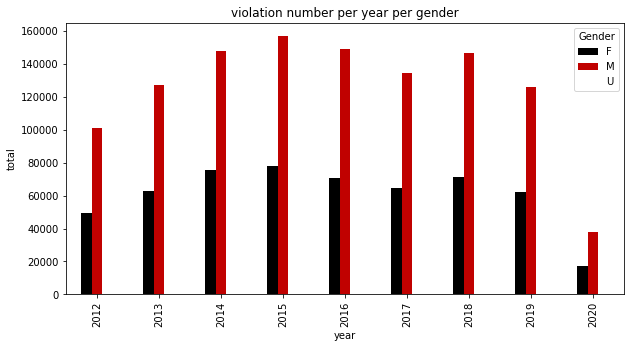

In [23]:
#Gender-wise traffic violation
plt.figure(figsize = (16,10))
gender_violation = traffic_new [['Violation','Gender','year']]

total = gender_violation .groupby(['year','Gender'])
totalsum = total['Violation'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'violation number per year per gender', colormap='gist_heat',figsize=(10,5))
plt.ylabel('total')
plt.show()

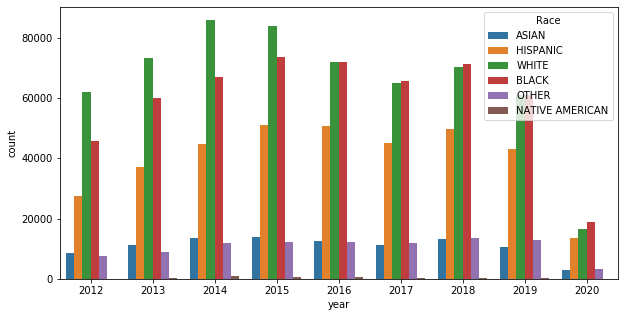

In [24]:
#Race-wise traffic violations
race_violation= traffic_new [['Violation','Race','year']]

plt.figure(figsize = (10,5))
ax = sns.countplot(x="year", hue="Race", data=race_violation)

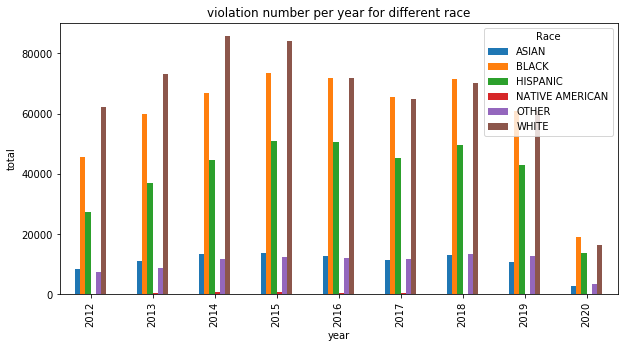

In [25]:
#Race-wise traffic violations
race_violation= traffic_new [['Violation','Race','year']]

total_race_viol = race_violation.groupby(['year','Race'])

totalsum = total_race_viol ['Violation'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'violation number per year for different race',figsize=(10,5))
plt.ylabel('total')
plt.show()

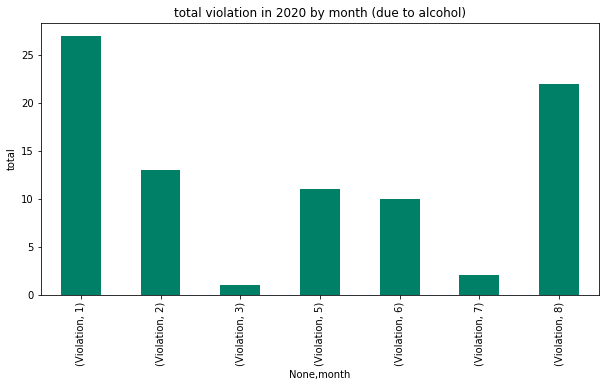

In [26]:
# traffic violations due to alchol
thisyear_violation = traffic_new 
filt = (thisyear_violation['Date Of Stop'] >= '2020-1-1') & (thisyear_violation['Date Of Stop'] < '2020-09-01') & (thisyear_violation['Alcohol'] != 0)
thisyear_violation = thisyear_violation.loc[filt]

thisyear_violation = thisyear_violation[['Violation','month']] 
total_thisyear_viol = thisyear_violation.groupby('month')
totalsum = total_thisyear_viol.aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'total violation in 2020 by month (due to alcohol)', colormap='summer',figsize=(10,5))
plt.ylabel('total')
plt.show()

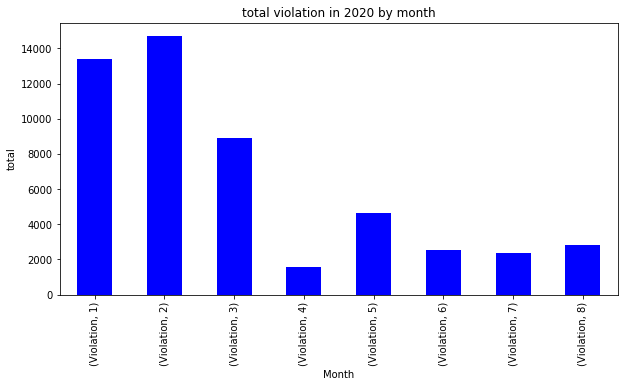

In [27]:
#Number of traffic violations in 2020
thisyear_violation = traffic_new 
filt = (thisyear_violation['Date Of Stop'] >= '2020-1-1') & (thisyear_violation['Date Of Stop'] < '2020-09-01') 
thisyear_violation = thisyear_violation.loc[filt]

thisyear_violation = thisyear_violation[['Violation','month']] 
total_thisyear_viol = thisyear_violation.groupby('month')
totalsum = total_thisyear_viol.aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'total violation in 2020 by month', colormap='winter',figsize=(10,5))
plt.ylabel('total')
plt.xlabel('Month')
plt.show()

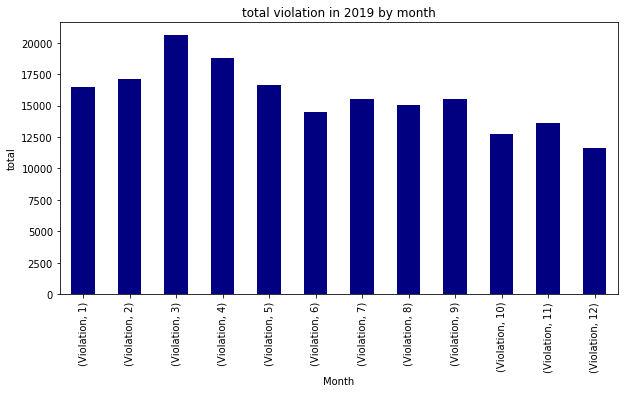

In [28]:
#Number of traffic violations in 2019
lastyear_violation = traffic_new 
filt = (lastyear_violation['Date Of Stop'] >= '2019-1-1') & (lastyear_violation['Date Of Stop'] < '2019-12-31') 
lastyear_violation = lastyear_violation.loc[filt]

lastyear_violation = lastyear_violation[['Violation','month']] 
total_lastyear_viol = lastyear_violation.groupby('month')
totalsum = total_lastyear_viol.aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'total violation in 2019 by month', colormap='jet',figsize=(10,5))
plt.ylabel('total')
plt.xlabel('Month')
plt.show()

In [29]:
duplicate_traffic = traffic_new.duplicated()
print(duplicate_traffic.sum())
traffic_new[duplicate_traffic]

2085


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Driver State,DL State,Arrest Type,Geolocation,date,year,month,time,day,Violation
1820,2019-12-14,2020-10-21 10:00:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...,GEORGIA AVE / PLYERS MILL RD,39.030183,-77.047616,0,0,...,VA,VA,A - Marked Patrol,"(39.030183, -77.0476163333333)",2019-12-14,2019,12,10:00:00,Saturday,1
3988,2019-08-13,2020-10-21 21:51:00,MCP,"4th District, Wheaton",FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...,12043 CLARIDGE RD,39.057237,-77.047795,1,0,...,MD,MD,A - Marked Patrol,"(39.0572366666667, -77.047795)",2019-08-13,2019,8,21:51:00,Tuesday,1
5033,2019-12-15,2020-10-21 04:03:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,CONNECTICUT AVE/VEIRS MILL RD,0.000000,0.000000,0,0,...,MD,MD,A - Marked Patrol,"(0.0, 0.0)",2019-12-15,2019,12,04:03:00,Sunday,1
5050,2019-08-14,2020-10-21 00:36:00,MCP,"3rd District, Silver Spring",FAILURE TO PROPERLY EQUIP & LOCATE HEADLAMPS O...,GEORGIA @ ELLSWORTH,38.995193,-77.026982,0,0,...,MD,MD,A - Marked Patrol,"(38.9951933333333, -77.0269816666667)",2019-08-14,2019,8,00:36:00,Wednesday,1
6428,2020-08-24,2020-10-21 17:49:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO STOP AFTER ACCIDENT INVOLVING DAMAG...,CHRISTOPHER AVE @ RT 355,39.184507,-77.263300,0,0,...,MD,MD,A - Marked Patrol,"(39.1845066666667, -77.2633)",2020-08-24,2020,8,17:49:00,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617893,2018-05-27,2020-10-21 08:48:00,MCP,"1st District, Rockville",DRIVER TURNING VEHICLE WITHOUT GIVING APPROPRI...,JONES LA / 28,39.126263,-77.235298,0,0,...,MD,MD,A - Marked Patrol,"(39.1262633333333, -77.2352983333333)",2018-05-27,2018,5,08:48:00,Sunday,1
1617986,2018-07-27,2020-10-21 20:26:00,MCP,"1st District, Rockville",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,DARNESTOWN RD / QUINCE ORCHARD RD,39.118413,-77.255417,0,0,...,MD,MD,A - Marked Patrol,"(39.1184133333333, -77.2554166666667)",2018-07-27,2018,7,20:26:00,Friday,1
1623360,2017-05-28,2020-10-21 01:00:00,MCP,"2nd District, Bethesda",FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...,BRIERLY DR @ WOODHAVEN,39.005550,-77.067105,0,0,...,MD,MD,A - Marked Patrol,"(39.00555, -77.067105)",2017-05-28,2017,5,01:00:00,Sunday,1
1624367,2014-11-05,2020-10-21 08:21:00,MCP,"1st District, Rockville",POSSESSING MORE THAN ONE DRIVER'S LICENSE AT A...,W/B SHADY GROVE ROAD @ PLEASANT DRIVE,39.120057,-77.181877,0,0,...,MD,MD,A - Marked Patrol,"(39.1200566666667, -77.1818766666667)",2014-11-05,2014,11,08:21:00,Wednesday,1


In [30]:
def compute_outcome_stats(df):
    """Compute statistics regarding the Violation types, Waring and and citations"""
    n_total = len(df)
    n_warnings = len(df[df['Violation Type'] == 'Warning'])
    n_citations = len(df[df['Violation Type']  == 'Citation'])
    citations_per_warning = n_citations / n_warnings
    
    return(pd.Series(data = { 
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'citations_per_warning': citations_per_warning,
    }))

In [31]:
compute_outcome_stats(traffic_new).astype(int)

n_total                  1682250
n_warnings                848382
n_citations               753492
citations_per_warning          0
dtype: int32

In [32]:
traffic_new.groupby('Gender').apply(compute_outcome_stats)

,n_total,n_warnings,n_citations,citations_per_warning
Gender,,,,
F,552073.0,308773.0,218542.0,0.707776
M,1127789.0,537548.0,534633.0,0.994577
U,2388.0,2061.0,317.0,0.153809


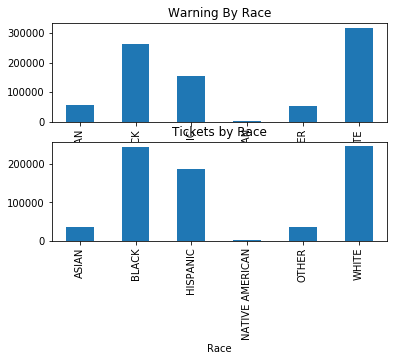

In [33]:
race_agg = traffic_new.groupby(['Race']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1)
race_agg['n_warnings'].plot.bar(ax=axes[0],  title="Warning By Race")
race_agg['n_citations'].plot.bar(ax=axes[1], title='Tickets by Race')

In [34]:
def compute_violation_stats(df2):
    """Compute statistics regarding Violations"""
    n_total = len(df2)
    n_alcohol = len(df2[df2['Alcohol'] == 1])
    n_belts = len(df2[df2['Belts']  == 1])
    n_Accident = len(df2[df2['Accident']  == 1]) 
    n_Personal_Injury = len(df2[df2['Personal Injury']  == 1]) 
    n_Property_Damage = len(df2[df2['Property Damage']  == 1]) 
    n_Fatal = len(df2[df2['Fatal']  == 1]) 
    return(pd.Series(data = { 
        'n_total': n_total,
        'DUI': n_alcohol,
        'n_belts': n_belts,
        'n_Accident' :n_Accident,
        'n_Personal Injury' : n_Personal_Injury,
        'n_Property Damage' :  n_Property_Damage, 
        'n_Fatal' : n_Fatal
        
    }))

In [35]:
compute_violation_stats(traffic_new).astype(int)

n_total              1682250
DUI                     2433
n_belts                51766
n_Accident             42051
n_Personal Injury      19526
n_Property Damage      33226
n_Fatal                  406
dtype: int32

# 3. Crash Reporting Incidents Data <a class="anchor" id="sec4"></a> 

 ## Reading "Crash Reporting Incidents Data" <a class="anchor" id="subsec_4_1"></a>  

In [36]:
CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
# Dimension of the dataframe :
np.shape(CRI)

(65031, 44)

In [37]:
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series
CRI.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,NaN,NaN,NaN,...,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39.026700,-77.136785,"(39.0267, -77.136785)"
1,MCP21620045,190046911,Montgomery County Police,Property Damage Crash,09/30/2019 10:15:00 AM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150866,-77.059781,"(39.15086647, -77.05978078)"
2,MCP2981002X,190046928,Montgomery County Police,Property Damage Crash,09/30/2019 07:00:00 PM,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.060069,-77.047198,"(39.06006941, -77.04719762)"
3,MCP21020022,200014382,Montgomery County Police,Injury Crash,03/29/2020 11:51:00 AM,No,Maryland (State),24.79,North,South,...,OTHER POLE,NON INTERSECTION,NaN,NaN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)"
4,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,No,NaN,NaN,NaN,NaN,...,OTHER POLE,NaN,NaN,NaN,NaN,NaN,NaN,39.103518,-77.157669,"(39.10351817, -77.15766933)"


 ## Cleaning the Data <a class="anchor" id="subsec_4_1_1"></a>  

In [38]:
 # Replace all NaN's by 0
CRI = CRI.fillna(0)

### Renaming & Replace

> The column name *Agency name* is changed *Agency* and "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [39]:
#Renaming the column and replacing 
CRI_new = CRI.rename(columns={"Agency Name": "Agency"})
CRI_new = CRI_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_new.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,MCP,Property Damage Crash,09/27/2019 09:38:00 AM,No,0,0.00,0,0,...,BUILDING,0,0,0,0,0,0,39.026700,-77.136785,"(39.0267, -77.136785)"
1,MCP21620045,190046911,MCP,Property Damage Crash,09/30/2019 10:15:00 AM,Yes,0,0.00,0,0,...,0,0,0,0,0,0,0,39.150866,-77.059781,"(39.15086647, -77.05978078)"
2,MCP2981002X,190046928,MCP,Property Damage Crash,09/30/2019 07:00:00 PM,Yes,0,0.00,0,0,...,0,0,0,0,0,0,0,39.060069,-77.047198,"(39.06006941, -77.04719762)"
3,MCP21020022,200014382,MCP,Injury Crash,03/29/2020 11:51:00 AM,No,Maryland (State),24.79,North,South,...,OTHER POLE,NON INTERSECTION,0,0,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)"
4,DD5620004G,190046109,RPD,Property Damage Crash,09/26/2019 07:20:00 AM,No,0,0.00,0,0,...,OTHER POLE,0,0,0,0,0,0,39.103518,-77.157669,"(39.10351817, -77.15766933)"


In [40]:
# Confirm the date column is in datetime format
CRI_new['Crash Date/Time'] = pd.to_datetime(CRI_new['Crash Date/Time'])
# creating a new columns, date, year and time in the data frame
CRI_new['date'] = pd.to_datetime(CRI_new['Crash Date/Time'])
CRI_new['year'] = CRI_new['Crash Date/Time'].dt.year
CRI_new['month'] = CRI_new['Crash Date/Time'].dt.month
CRI_new['time'] = CRI_new['Crash Date/Time'].dt.time
CRI_new['day'] = CRI_new['Crash Date/Time'].dt.weekday_name
CRI_new.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Road Condition,Road Division,Latitude,Longitude,Location,date,year,month,time,day
0,MCP3048005T,190046316,MCP,Property Damage Crash,2019-09-27 09:38:00,No,0,0.00,0,0,...,0,0,39.026700,-77.136785,"(39.0267, -77.136785)",2019-09-27 09:38:00,2019,9,09:38:00,Friday
1,MCP21620045,190046911,MCP,Property Damage Crash,2019-09-30 10:15:00,Yes,0,0.00,0,0,...,0,0,39.150866,-77.059781,"(39.15086647, -77.05978078)",2019-09-30 10:15:00,2019,9,10:15:00,Monday
2,MCP2981002X,190046928,MCP,Property Damage Crash,2019-09-30 19:00:00,Yes,0,0.00,0,0,...,0,0,39.060069,-77.047198,"(39.06006941, -77.04719762)",2019-09-30 19:00:00,2019,9,19:00:00,Monday
3,MCP21020022,200014382,MCP,Injury Crash,2020-03-29 11:51:00,No,Maryland (State),24.79,North,South,...,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)",2020-03-29 11:51:00,2020,3,11:51:00,Sunday
4,DD5620004G,190046109,RPD,Property Damage Crash,2019-09-26 07:20:00,No,0,0.00,0,0,...,0,0,39.103518,-77.157669,"(39.10351817, -77.15766933)",2019-09-26 07:20:00,2019,9,07:20:00,Thursday


In [41]:
CRI_new['crash'] = pd.Series(1, index=CRI.index)
CRI_new.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Road Division,Latitude,Longitude,Location,date,year,month,time,day,crash
0,MCP3048005T,190046316,MCP,Property Damage Crash,2019-09-27 09:38:00,No,0,0.00,0,0,...,0,39.026700,-77.136785,"(39.0267, -77.136785)",2019-09-27 09:38:00,2019,9,09:38:00,Friday,1
1,MCP21620045,190046911,MCP,Property Damage Crash,2019-09-30 10:15:00,Yes,0,0.00,0,0,...,0,39.150866,-77.059781,"(39.15086647, -77.05978078)",2019-09-30 10:15:00,2019,9,10:15:00,Monday,1
2,MCP2981002X,190046928,MCP,Property Damage Crash,2019-09-30 19:00:00,Yes,0,0.00,0,0,...,0,39.060069,-77.047198,"(39.06006941, -77.04719762)",2019-09-30 19:00:00,2019,9,19:00:00,Monday,1
3,MCP21020022,200014382,MCP,Injury Crash,2020-03-29 11:51:00,No,Maryland (State),24.79,North,South,...,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.245390,-77.116622,"(39.24538965, -77.1166219)",2020-03-29 11:51:00,2020,3,11:51:00,Sunday,1
4,DD5620004G,190046109,RPD,Property Damage Crash,2019-09-26 07:20:00,No,0,0.00,0,0,...,0,39.103518,-77.157669,"(39.10351817, -77.15766933)",2019-09-26 07:20:00,2019,9,07:20:00,Thursday,1


In [42]:
CRI_new.describe()

,Mile Point,Lane Number,Number of Lanes,Distance,Latitude,Longitude,year,month,crash
count,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.000000,65031.0
mean,3.520718,1.209885,2.066476,56.551419,39.083349,-77.114235,2017.271332,6.522074,1.0
std,5.286111,0.981156,1.316812,131.001762,0.073416,0.101091,1.588921,3.456689,0.0
min,0.000000,0.000000,0.000000,0.000000,37.720000,-79.486000,2015.000000,1.000000,1.0
25%,0.159000,1.000000,1.000000,0.000000,39.024080,-77.190503,2016.000000,4.000000,1.0
50%,1.350000,1.000000,2.000000,0.000000,39.075417,-77.107138,2017.000000,7.000000,1.0
75%,4.500000,2.000000,3.000000,50.000000,39.140073,-77.040848,2019.000000,10.000000,1.0
max,300.000000,8.000000,13.000000,1000.000000,39.990414,-75.527708,2020.000000,12.000000,1.0


In [43]:
duplicate_CRI = CRI_new.duplicated()
print(duplicate_CRI.sum())
CRI_new[duplicate_CRI]

0


,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Road Division,Latitude,Longitude,Location,date,year,month,time,day,crash


# 4. Crash Reporting – Non-Motorists Data <a class="anchor" id="sec5"></a> 

## Reading "Crash Reporting - Non-Motorists Data"  <a class="anchor" id="subsec_5_1"></a>  

In [44]:
CRNM= pd.read_csv("Crash_Reporting_-_Non-Motorists_Data.csv")
CRNM.shape

(3738, 32)

## Cleaning the Data <a class="anchor" id="subsec_5_1_1"></a>  

In [45]:
 # Replace all NaN's by 0
CRNM = CRNM.fillna(0)

### Renaming & Replace

> The column name *Agency name* is changed *Agency* and "Montgomery County Police" is changed to "MCP" as in traffic violation data.

In [46]:
#Renaming the column and replacing 
CRNM_new = CRNM.rename(columns={"Agency Name": "Agency"})
CRNM_new = CRNM_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_new.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
0,MCP29730056,200029057,MCP,Injury Crash,07/27/2020 02:09:00 AM,Maryland (State),GEORGIA AVE,County,HENDERSON AVE,0,...,NO IMPROPER ACTIONS,SIDEWALK,0,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,0,39.050164,-77.051634,"(39.05016403, -77.05163365)"
1,MCP28460064,200028872,MCP,Injury Crash,07/25/2020 12:24:00 PM,0,0,0,0,12041 GEORGIA AVE (M&T BANK PARKING LOT),...,NO IMPROPER ACTIONS,SIDEWALK,0,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,NONE,39.052582,-77.050316,"(39.05258193, -77.05031596)"
2,DD5604003K,200029470,RPD,Injury Crash,07/29/2020 04:41:00 PM,Municipality,EDMONSTON DR,Municipality,VEIRS MILL SERV RD,0,...,FAILURE TO OBEY TRAFFIC SIGNS SIGNALS OR OFFICER,ON ROADWAY NOT AT CROSSWALK,NO PED. SIGNAL,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.078304,-77.130517,"(39.078304, -77.13051683)"
3,MCP23480052,190024574,MCP,Injury Crash,05/23/2019 05:30:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),UNIVERSITY BLVD W,0,...,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,OBEYED PED. SIGNAL,LIGHT CLOTHING,No,SUSPECTED SERIOUS INJURY,0,39.041653,-77.051877,"(39.04165333, -77.05187667)"
4,MCP20160048,190026280,MCP,Injury Crash,06/02/2019 12:19:00 PM,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,0,...,NO IMPROPER ACTIONS,SIDEWALK,0,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)"


In [47]:
# Confirm the date column is in datetime format
CRNM_new['Crash Date/Time'] = pd.to_datetime(CRNM_new['Crash Date/Time'])
# creating a new columns, date, year and time in the data frame
CRNM_new['date'] = pd.to_datetime(CRNM_new['Crash Date/Time'])
CRNM_new['year'] = CRNM_new['Crash Date/Time'].dt.year
CRNM_new['month'] = CRNM_new['Crash Date/Time'].dt.month
CRNM_new['time'] = CRNM_new['Crash Date/Time'].dt.time
CRNM_new['day'] = CRNM_new['Crash Date/Time'].dt.weekday_name
CRNM_new.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Injury Severity,Safety Equipment,Latitude,Longitude,Location,date,year,month,time,day
0,MCP29730056,200029057,MCP,Injury Crash,2020-07-27 02:09:00,Maryland (State),GEORGIA AVE,County,HENDERSON AVE,0,...,SUSPECTED SERIOUS INJURY,0,39.050164,-77.051634,"(39.05016403, -77.05163365)",2020-07-27 02:09:00,2020,7,02:09:00,Monday
1,MCP28460064,200028872,MCP,Injury Crash,2020-07-25 12:24:00,0,0,0,0,12041 GEORGIA AVE (M&T BANK PARKING LOT),...,SUSPECTED MINOR INJURY,NONE,39.052582,-77.050316,"(39.05258193, -77.05031596)",2020-07-25 12:24:00,2020,7,12:24:00,Saturday
2,DD5604003K,200029470,RPD,Injury Crash,2020-07-29 16:41:00,Municipality,EDMONSTON DR,Municipality,VEIRS MILL SERV RD,0,...,SUSPECTED MINOR INJURY,NONE,39.078304,-77.130517,"(39.078304, -77.13051683)",2020-07-29 16:41:00,2020,7,16:41:00,Wednesday
3,MCP23480052,190024574,MCP,Injury Crash,2019-05-23 17:30:00,Maryland (State),GEORGIA AVE,Maryland (State),UNIVERSITY BLVD W,0,...,SUSPECTED SERIOUS INJURY,0,39.041653,-77.051877,"(39.04165333, -77.05187667)",2019-05-23 17:30:00,2019,5,17:30:00,Thursday
4,MCP20160048,190026280,MCP,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,0,...,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019-06-02 12:19:00,2019,6,12:19:00,Sunday


In [48]:
CRNM_new['crash'] = pd.Series(1, index=CRNM.index)
CRNM_new.head()

,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Safety Equipment,Latitude,Longitude,Location,date,year,month,time,day,crash
0,MCP29730056,200029057,MCP,Injury Crash,2020-07-27 02:09:00,Maryland (State),GEORGIA AVE,County,HENDERSON AVE,0,...,0,39.050164,-77.051634,"(39.05016403, -77.05163365)",2020-07-27 02:09:00,2020,7,02:09:00,Monday,1
1,MCP28460064,200028872,MCP,Injury Crash,2020-07-25 12:24:00,0,0,0,0,12041 GEORGIA AVE (M&T BANK PARKING LOT),...,NONE,39.052582,-77.050316,"(39.05258193, -77.05031596)",2020-07-25 12:24:00,2020,7,12:24:00,Saturday,1
2,DD5604003K,200029470,RPD,Injury Crash,2020-07-29 16:41:00,Municipality,EDMONSTON DR,Municipality,VEIRS MILL SERV RD,0,...,NONE,39.078304,-77.130517,"(39.078304, -77.13051683)",2020-07-29 16:41:00,2020,7,16:41:00,Wednesday,1
3,MCP23480052,190024574,MCP,Injury Crash,2019-05-23 17:30:00,Maryland (State),GEORGIA AVE,Maryland (State),UNIVERSITY BLVD W,0,...,0,39.041653,-77.051877,"(39.04165333, -77.05187667)",2019-05-23 17:30:00,2019,5,17:30:00,Thursday,1
4,MCP20160048,190026280,MCP,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,0,...,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019-06-02 12:19:00,2019,6,12:19:00,Sunday,1


In [49]:
duplicate_CRNM = CRNM_new.duplicated()
print(duplicate_CRNM.sum())
CRNM_new[duplicate_CRNM]

0


,Report Number,Local Case Number,Agency,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Safety Equipment,Latitude,Longitude,Location,date,year,month,time,day,crash


# Merging Two Data Frames

## Checking for common column names

In [50]:
CRI_new.columns

Index(['Report Number', 'Local Case Number', 'Agency', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point',
       'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Lane Type',
       'Number of Lanes', 'Direction', 'Distance', 'Distance Unit',
       'Road Grade', 'NonTraffic', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Location',
       'date', 'year', 'month', 'time', 'day', 'crash'],
      dtype='object')

In [51]:
CRNM_new.columns

Index(['Report Number', 'Local Case Number', 'Agency', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Pedestrian Type', 'Pedestrian Movement', 'Pedestrian Actions',
       'Pedestrian Location', 'Pedestrian Obeyed Traffic Signal',
       'Pedestrian Visibility', 'At Fault', 'Injury Severity',
       'Safety Equipment', 'Latitude', 'Longitude', 'Location', 'date', 'year',
       'month', 'time', 'day', 'crash'],
      dtype='object')

In [52]:
# The following command gives the columns names which are common to different data frames
set(CRI_new.columns).intersection(set(CRNM_new.columns))

{'ACRS Report Type',
 'Agency',
 'At Fault',
 'Collision Type',
 'Crash Date/Time',
 'Cross-Street Name',
 'Cross-Street Type',
 'Driver Substance Abuse',
 'Latitude',
 'Light',
 'Local Case Number',
 'Location',
 'Longitude',
 'Municipality',
 'Non-Motorist Substance Abuse',
 'Off-Road Description',
 'Related Non-Motorist',
 'Report Number',
 'Road Name',
 'Route Type',
 'Surface Condition',
 'Traffic Control',
 'Weather',
 'crash',
 'date',
 'day',
 'month',
 'time',
 'year'}

# Merging Crash Incident Data and Crash Non-Motorists Data

> Merged two data frames by selecting common column names which is listed below and defined new data frame *crash*.

In [53]:
crash = pd.merge(CRI_new, CRNM_new, how='inner', on = ['Agency','ACRS Report Type', 'Collision Type','Cross-Street Type',  'Cross-Street Name', 'Crash Date/Time', 'Driver Substance Abuse', 'Location', 'Light','Latitude', 'Longitude', 'Municipality', 'Non-Motorist Substance Abuse','Off-Road Description', 'Related Non-Motorist', 'Report Number', 'Road Name', 'Route Type', 'Surface Condition',  'Traffic Control', 'Weather', 'date','month', 'time', 'year','day','crash'])

In [54]:
crash.columns

Index(['Report Number', 'Local Case Number_x', 'Agency', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point',
       'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Lane Type',
       'Number of Lanes', 'Direction', 'Distance', 'Distance Unit',
       'Road Grade', 'NonTraffic', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'At Fault_x', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Location',
       'date', 'year', 'month', 'time', 'day', 'crash', 'Local Case Number_y',
       'Person ID', 'Pedestrian Type', 'Pedestrian Movement',
      

In [55]:
print("dimension of crash incident data : ", CRI_new.shape)
print("dimension of crash non-motorists data : ", CRNM_new.shape)
print("dimension of merged crash data : ", crash.shape)

dimension of crash incident data :  (65031, 50)
dimension of crash non-motorists data :  (3738, 38)
dimension of merged crash data :  (3688, 61)


In [56]:
# Replace yes by 1 and No by 0
crash = crash.replace( {'Yes' : 1, 'No' : 0})

In [57]:
crash.describe()

,Hit/Run,Mile Point,Lane Number,Number of Lanes,Distance,NonTraffic,Latitude,Longitude,year,month,crash,Local Case Number_y
count,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.0,3.688000e+03
mean,0.160521,2.088306,0.979393,1.671095,34.752248,0.221258,39.071550,-77.111563,2017.292028,6.646421,1.0,1.133808e+08
std,0.367138,3.823158,0.924669,1.317924,101.518647,0.415150,0.070041,0.093734,1.625209,3.482333,0.0,8.354866e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.554005,-79.181926,2015.000000,1.000000,1.0,1.705200e+04
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,39.012075,-77.179620,2016.000000,4.000000,1.0,1.602615e+07
50%,0.000000,0.400000,1.000000,2.000000,0.000000,0.000000,39.061201,-77.099023,2017.000000,7.000000,1.0,1.705305e+08
75%,0.000000,2.350000,1.000000,3.000000,10.000000,0.000000,39.121607,-77.045329,2019.000000,10.000000,1.0,1.900087e+08
max,1.000000,29.600000,6.000000,7.000000,985.000000,1.000000,39.426657,-76.916257,2020.000000,12.000000,1.0,2.000385e+08


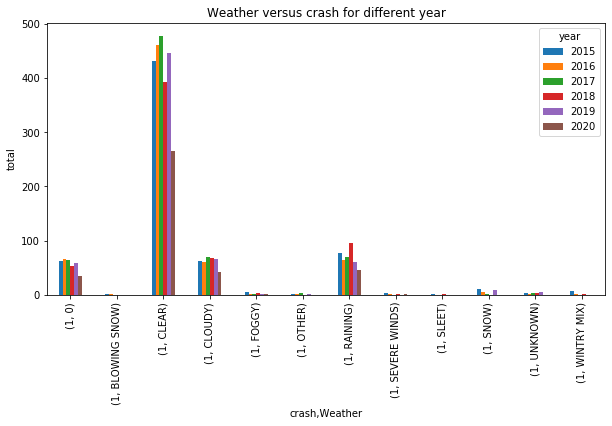

In [58]:
#weather vresus crash

crash_weather = crash [['Weather','year','crash']]

total_crash = crash_weather .groupby(['crash','Weather','year'])
totalsum = total_crash['crash'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'Weather versus crash for different year', figsize=(10,5))
plt.ylabel('total')
plt.show()

In [59]:
crash_weather

,Weather,year,crash
0,CLEAR,2020,1
1,CLOUDY,2020,1
2,RAINING,2020,1
3,CLEAR,2019,1
4,CLEAR,2019,1
...,...,...,...
3683,CLEAR,2018,1
3684,CLEAR,2015,1
3685,FOGGY,2019,1
3686,CLEAR,2019,1


# Merging Traffic Violation and Crash Data

> Merged two data frames by selecting common column names which is listed below and defined new data frame ***traffic_crash***.

In [60]:
# The following command gives the columns names which are common to different data frames
set(traffic_new.columns).intersection(set(crash.columns))

{'Agency',
 'Latitude',
 'Location',
 'Longitude',
 'date',
 'day',
 'month',
 'time',
 'year'}

In [61]:
traffic_crash = pd.merge(traffic_new, crash, how='inner', on = ['Agency', 'Latitude', 'Longitude', 'month', 'time', 'year'])

In [62]:
traffic_crash

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location_x,Latitude,Longitude,Accident,Belts,...,Person ID,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault_y,Injury Severity,Safety Equipment
0,2019-08-08,2020-10-21 14:14:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVER FAILURE TO EXERCISE DUE CARE TO AVOID P...,"19110 MONT VILLAGE AVE, CVS LOT",39.170580,-77.205095,0,0,...,EF3903AC-B579-42A9-937A-6C2128FDED45,PEDESTRIAN,Other,OTHER,OTHER,0,MIXED CLOTHING,0,SUSPECTED MINOR INJURY,0
1,2018-10-20,2020-10-21 19:19:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...,OLD GEORGETOWN @ GLENBROOK,38.989170,-77.101440,1,0,...,C71E0BCF-E0EC-45B9-964B-A613D70356F9,BICYCLIST,Cross/Enter at Intersection,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,0,HEAD LIGHT,0,POSSIBLE INJURY,MC/BIKE HELMET
2,2019-11-12,2020-10-21 06:58:00,MCP,"3rd District, Silver Spring",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,1F3EEC1F-5B89-489C-A4DA-F13E24A9BC70,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,0,SUSPECTED MINOR INJURY,NONE
3,2019-11-12,2020-10-21 06:58:00,MCP,"3rd District, Silver Spring",DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,1F3EEC1F-5B89-489C-A4DA-F13E24A9BC70,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,0,SUSPECTED MINOR INJURY,NONE
4,2019-11-12,2020-10-21 06:58:00,MCP,"3rd District, Silver Spring",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,1F3EEC1F-5B89-489C-A4DA-F13E24A9BC70,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,0,SUSPECTED MINOR INJURY,NONE
5,2019-11-12,2020-10-21 06:58:00,MCP,"3rd District, Silver Spring",DISPLAY SUSPENDED LIC.,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,1F3EEC1F-5B89-489C-A4DA-F13E24A9BC70,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,0,SUSPECTED MINOR INJURY,NONE
6,2019-11-12,2020-10-21 06:58:00,MCP,"3rd District, Silver Spring",POSSESSING SUSPENDED LIC.,OAKVIEW DR @ MT PISGAH RD,39.015115,-76.976650,1,0,...,1F3EEC1F-5B89-489C-A4DA-F13E24A9BC70,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,AT INTERSECTION MARKED CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,0,SUSPECTED MINOR INJURY,NONE
7,2016-08-03,2020-10-21 13:53:00,MCP,"3rd District, Silver Spring",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,RT 193 E @ CARROLL AVE,38.994180,-76.992720,1,0,...,633CAA4E-3116-480E-8F37-8529F74F9083,OTHER,Standing,NO IMPROPER ACTIONS,OTHER,0,REFLECTIVE MATERIAL,0,NO APPARENT INJURY,OTHER
8,2016-06-03,2020-10-21 12:03:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO YIELD RIGHT OF WAY ENTERING ...,EXECUTIVE BLVD @ OLD GEORGETOWN RD,39.047290,-77.117690,1,0,...,F6BECD71-9C52-4DD4-B4BB-1A0C26208BB0,BICYCLIST,Cross/Enter at Intersection,NO IMPROPER ACTIONS,SIDEWALK,NO PED. SIGNAL,LIGHT CLOTHING,0,SUSPECTED MINOR INJURY,MC/BIKE HELMET
9,2018-12-14,2020-10-21 08:36:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVER FAILURE TO EXERCISE DUE CARE TO AVOID P...,SNOUFFER SCHOOL RD/LEWISBERRY DR,39.182880,-77.182245,0,0,...,6052B498-AA78-4427-8C77-340E0E65C52F,PEDESTRIAN,Unknown,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,OBEYED PED. SIGNAL,0,0,SUSPECTED MINOR INJURY,0


In [63]:
print("dimension of crash incident data : ", crash.shape)
print("dimension oftraffic violation data : ", traffic_new.shape)
print("dimension of merged  data : ", traffic_crash.shape)

dimension of crash incident data :  (3688, 61)
dimension oftraffic violation data :  (1682250, 41)
dimension of merged  data :  (42, 96)


In [64]:
traffic_crash.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location_x', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'date_x', 'year', 'month', 'time', 'day_x', 'Violation',
       'Report Number', 'Local Case Number_x', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point',
       'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Lane Type',
       'Number of Lanes', 'Direction', 'Distance', 'Distance Unit',
       'Road Grade', 'NonTraffic', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality

In [65]:
# selecting the columns
columns = traffic_crash[['Date Of Stop', 'Time Of Stop','SubAgency',  'Latitude', 'Longitude','Year_model', 'Make', 'Model', 'Color', 'Violation Type','Collision Type','Weather', 'Surface Condition', 'Light', 'Traffic Control','Gender','Race','year', 'month', 'time']]

In [66]:
#creating the new dataframe
traffic_crash_new = columns.copy()
traffic_crash.shape

(42, 96)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


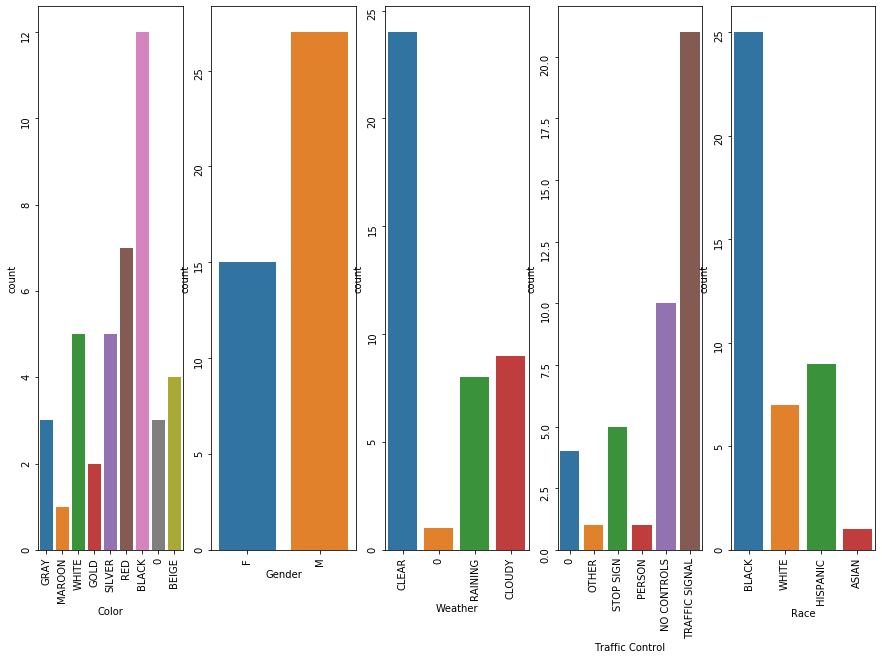

In [67]:
fig, ax = plt.subplots(1,5,figsize=(15,10))
sns.countplot(traffic_crash_new['Color'], ax=ax[0])
sns.countplot(traffic_crash_new['Gender'], ax=ax[1])
sns.countplot(traffic_crash_new['Weather'], ax=ax[2])
sns.countplot(traffic_crash_new['Traffic Control'], ax=ax[3])
sns.countplot(traffic_crash_new['Race'], ax=ax[4])
#ax.set_xticklabels(a2.get_xticklabels(), rotation=90)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
#fig.tight_layout(pad=3.0)
fig.show()
plt.savefig("test.jpg", dpi=300, bbox_inches="tight")

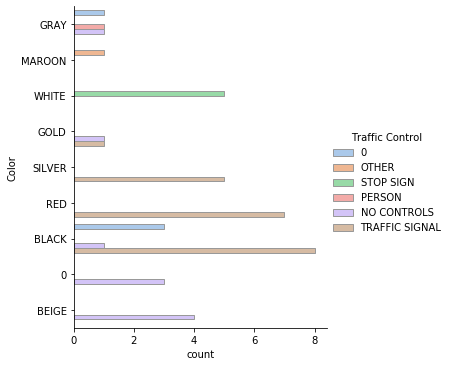

In [72]:
sns.catplot(y="Color", hue="Traffic Control", kind="count",
            palette="pastel", edgecolor=".6",
            data=traffic_crash_new)

In [69]:
#df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
#fig = px.bar(traffic_crash_new,  x='Color', text='Latitude')
#fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#fig.show()